In [2]:
import pandas as pd

In [5]:
df = pd.read_csv(r"C:\Users\ts\Downloads\Credit Card Default.csv")
df.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [6]:
df.dropna()
df = df[(df >= 0).all(axis=1)]
print(df)

      clientid        income        age         loan  default
0            1  66155.925095  59.017015  8106.532131        0
1            2  34415.153966  48.117153  6564.745018        0
2            3  57317.170063  63.108049  8020.953296        0
3            4  42709.534201  45.751972  6103.642260        0
4            5  66952.688845  18.584336  8770.099235        1
...        ...           ...        ...          ...      ...
1995      1996  59221.044874  48.518179  1926.729397        0
1996      1997  69516.127573  23.162104  3503.176156        0
1997      1998  44311.449262  28.017167  5522.786693        1
1998      1999  43756.056605  63.971796  1622.722598        0
1999      2000  69436.579552  56.152617  7378.833599        0

[1994 rows x 5 columns]


In [7]:
Y = df.loc[:, ["default"]]
X = df.loc[:, ["income","loan","age"]]

In [8]:
from sklearn import tree
model = tree.DecisionTreeClassifier(ccp_alpha=0.01)

In [9]:
model.fit(X,Y)

DecisionTreeClassifier(ccp_alpha=0.01)

In [10]:
pred = model.predict(X)

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
cm = confusion_matrix(Y, pred)
accuracy= (cm[0,0] + cm[1,1])/(sum(sum(cm)))

In [13]:
print(cm)
print(accuracy)

[[1692   19]
 [  20  263]]
0.9804413239719157


In [14]:
import matplotlib.pyplot as plt

[Text(669.5999999999999, 489.24, 'X[2] <= 34.921\ngini = 0.244\nsamples = 1994\nvalue = [1711, 283]'),
 Text(558.0, 380.52000000000004, 'X[1] <= 5834.042\ngini = 0.471\nsamples = 746\nvalue = [463, 283]'),
 Text(223.2, 271.8, 'X[1] <= 3283.441\ngini = 0.277\nsamples = 511\nvalue = [426, 85]'),
 Text(111.6, 163.08000000000004, 'gini = 0.066\nsamples = 320\nvalue = [309, 11]'),
 Text(334.79999999999995, 163.08000000000004, 'X[0] <= 38026.906\ngini = 0.475\nsamples = 191\nvalue = [117, 74]'),
 Text(223.2, 54.360000000000014, 'gini = 0.263\nsamples = 77\nvalue = [12, 65]'),
 Text(446.4, 54.360000000000014, 'gini = 0.145\nsamples = 114\nvalue = [105, 9]'),
 Text(892.8, 271.8, 'X[1] <= 7707.778\ngini = 0.265\nsamples = 235\nvalue = [37, 198]'),
 Text(781.1999999999999, 163.08000000000004, 'X[0] <= 58474.98\ngini = 0.43\nsamples = 115\nvalue = [36, 79]'),
 Text(669.5999999999999, 54.360000000000014, 'gini = 0.131\nsamples = 85\nvalue = [6, 79]'),
 Text(892.8, 54.360000000000014, 'gini = 0.0\n

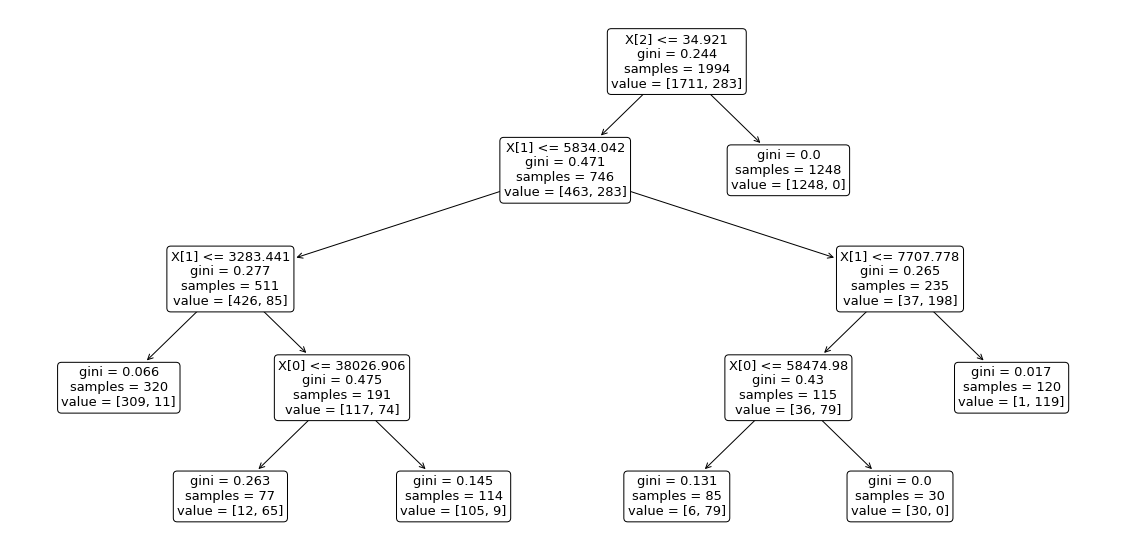

In [15]:
plt.subplots(figsize=(20,10))
tree.plot_tree(model, fontsize=13,rounded=True, )


In [16]:
import seaborn as sb

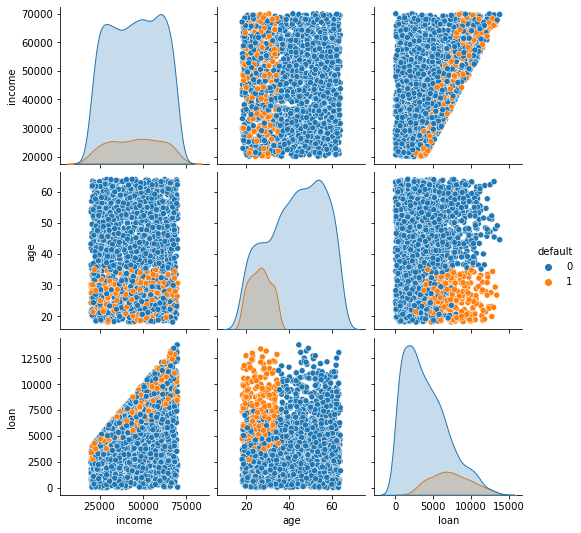

In [17]:
sb.pairplot(df,vars=["income","age","loan"],hue="default",diag_kind="kde")